In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random

In [3]:
employees = ['EA', 'KR', 'KB', 'CP', 'MM', 'MC']
targets = [65, 45, 85, 45, 85, 70]
months = ['Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov',
         'Dec', 'Jan', 'Feb', 'Mar']

In [4]:
df = pd.DataFrame(list(zip(employees, targets)), columns=['Employees', months[0]])
df.set_index('Employees', inplace=True)
df

,Apr
Employees,
EA,65
KR,45
KB,85
CP,45
MM,85
MC,70


In [5]:
for month in months[1:-5]:
    random_data = [random.randrange(60,140)/100 for employee in df.index]
    df[month] = df['Apr'] * random_data
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65,90.35,54.60,84.50,78.65,72.15,74.10
KR,45,57.15,49.95,47.25,34.65,59.40,59.40
KB,85,66.30,98.60,58.65,118.15,102.00,63.75
CP,45,55.35,28.35,60.75,58.05,42.30,39.60
MM,85,53.55,52.70,54.40,90.10,74.80,85.00
MC,70,72.10,65.80,88.20,42.70,55.30,51.10


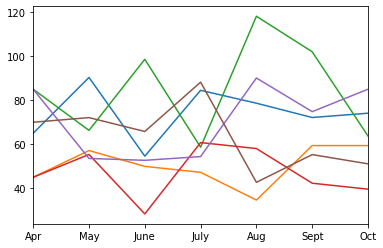

In [6]:
df.T.plot(legend=False)

In [7]:
habitat_avg = df.loc[['EA', 'KR', 'KB']].mean()
habitat_avg

Apr     65.000000
May     71.266667
June    67.716667
July    63.466667
Aug     77.150000
Sept    77.850000
Oct     65.750000
dtype: float64

In [8]:
df.loc['Habitat'] = habitat_avg.T
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65.0,90.350000,54.600000,84.500000,78.65,72.15,74.10
KR,45.0,57.150000,49.950000,47.250000,34.65,59.40,59.40
KB,85.0,66.300000,98.600000,58.650000,118.15,102.00,63.75
CP,45.0,55.350000,28.350000,60.750000,58.05,42.30,39.60
MM,85.0,53.550000,52.700000,54.400000,90.10,74.80,85.00
MC,70.0,72.100000,65.800000,88.200000,42.70,55.30,51.10
Habitat,65.0,71.266667,67.716667,63.466667,77.15,77.85,65.75


In [9]:
df.loc['Water'] = df.loc[['CP', 'MM', 'MC']].mean()
df

,Apr,May,June,July,Aug,Sept,Oct
Employees,,,,,,,
EA,65.000000,90.350000,54.600000,84.500000,78.650000,72.150000,74.100000
KR,45.000000,57.150000,49.950000,47.250000,34.650000,59.400000,59.400000
KB,85.000000,66.300000,98.600000,58.650000,118.150000,102.000000,63.750000
CP,45.000000,55.350000,28.350000,60.750000,58.050000,42.300000,39.600000
MM,85.000000,53.550000,52.700000,54.400000,90.100000,74.800000,85.000000
MC,70.000000,72.100000,65.800000,88.200000,42.700000,55.300000,51.100000
Habitat,65.000000,71.266667,67.716667,63.466667,77.150000,77.850000,65.750000
Water,66.666667,60.333333,48.950000,67.783333,63.616667,57.466667,58.566667


In [10]:
#Projected Monthly Utilization = If in month, projected utilization, else actual utilization
projected = pd.DataFrame(data=df.index, columns=['Employees']).set_index('Employees')
#Projected Yearly Utilization = weighted average of all utilization

In [11]:
projected

""
Employees
EA
KR
KB
CP
MM
MC
Habitat
Water


In [12]:
projected['Apr'] = df['Apr']
projected

,Apr
Employees,
EA,65.000000
KR,45.000000
KB,85.000000
CP,45.000000
MM,85.000000
MC,70.000000
Habitat,65.000000
Water,66.666667


In [13]:
df.mean(axis=1)

Employees
EA         74.192857
KR         50.400000
KB         84.635714
CP         47.057143
MM         70.792857
MC         63.600000
Habitat    69.742857
Water      60.483333
dtype: float64

In [14]:
df.iloc[:,-1]

Employees
EA         74.100000
KR         59.400000
KB         63.750000
CP         39.600000
MM         85.000000
MC         51.100000
Habitat    65.750000
Water      58.566667
Name: Oct, dtype: float64

In [15]:
for month in months:
    if month in df.columns:
        projected[month] = df[month]
    else:
        projected[month] = df.iloc[:,-1]
projected

,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Employees,,,,,,,,,,,,
EA,65.000000,90.350000,54.600000,84.500000,78.650000,72.150000,74.100000,74.100000,74.100000,74.100000,74.100000,74.100000
KR,45.000000,57.150000,49.950000,47.250000,34.650000,59.400000,59.400000,59.400000,59.400000,59.400000,59.400000,59.400000
KB,85.000000,66.300000,98.600000,58.650000,118.150000,102.000000,63.750000,63.750000,63.750000,63.750000,63.750000,63.750000
CP,45.000000,55.350000,28.350000,60.750000,58.050000,42.300000,39.600000,39.600000,39.600000,39.600000,39.600000,39.600000
MM,85.000000,53.550000,52.700000,54.400000,90.100000,74.800000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
MC,70.000000,72.100000,65.800000,88.200000,42.700000,55.300000,51.100000,51.100000,51.100000,51.100000,51.100000,51.100000
Habitat,65.000000,71.266667,67.716667,63.466667,77.150000,77.850000,65.750000,65.750000,65.750000,65.750000,65.750000,65.750000
Water,66.666667,60.333333,48.950000,67.783333,63.616667,57.466667,58.566667,58.566667,58.566667,58.566667,58.566667,58.566667


In [16]:
projected.loc[:,'Apr': 'July']

,Apr,May,June,July
Employees,,,,
EA,65.000000,90.350000,54.600000,84.500000
KR,45.000000,57.150000,49.950000,47.250000
KB,85.000000,66.300000,98.600000,58.650000
CP,45.000000,55.350000,28.350000,60.750000
MM,85.000000,53.550000,52.700000,54.400000
MC,70.000000,72.100000,65.800000,88.200000
Habitat,65.000000,71.266667,67.716667,63.466667
Water,66.666667,60.333333,48.950000,67.783333


In [17]:
projected_y = pd.DataFrame(data=df.index, columns=['Employees']).set_index('Employees')
for month in months:
    projected_y[month] = projected.loc[:,months[0]:month].mean(axis=1)
projected_y

,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec,Jan,Feb,Mar
Employees,,,,,,,,,,,,
EA,65.000000,77.675000,69.983333,73.612500,74.62,74.208333,74.192857,74.18125,74.172222,74.165000,74.159091,74.154167
KR,45.000000,51.075000,50.700000,49.837500,46.80,48.900000,50.400000,51.52500,52.400000,53.100000,53.672727,54.150000
KB,85.000000,75.650000,83.300000,77.137500,85.34,88.116667,84.635714,82.02500,79.994444,78.370000,77.040909,75.933333
CP,45.000000,50.175000,42.900000,47.362500,49.50,48.300000,47.057143,46.12500,45.400000,44.820000,44.345455,43.950000
MM,85.000000,69.275000,63.750000,61.412500,67.15,68.425000,70.792857,72.56875,73.950000,75.055000,75.959091,76.712500
MC,70.000000,71.050000,69.300000,74.025000,67.76,65.683333,63.600000,62.03750,60.822222,59.850000,59.054545,58.391667
Habitat,65.000000,68.133333,67.994444,66.862500,68.92,70.408333,69.742857,69.24375,68.855556,68.545000,68.290909,68.079167
Water,66.666667,63.500000,58.650000,60.933333,61.47,60.802778,60.483333,60.24375,60.057407,59.908333,59.786364,59.684722


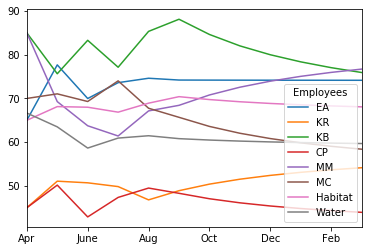

In [18]:
projected_y.T.plot()

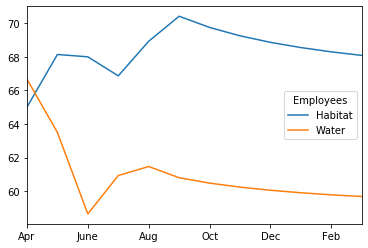

In [19]:
projected_y.loc[['Habitat', 'Water'],:].T.plot()

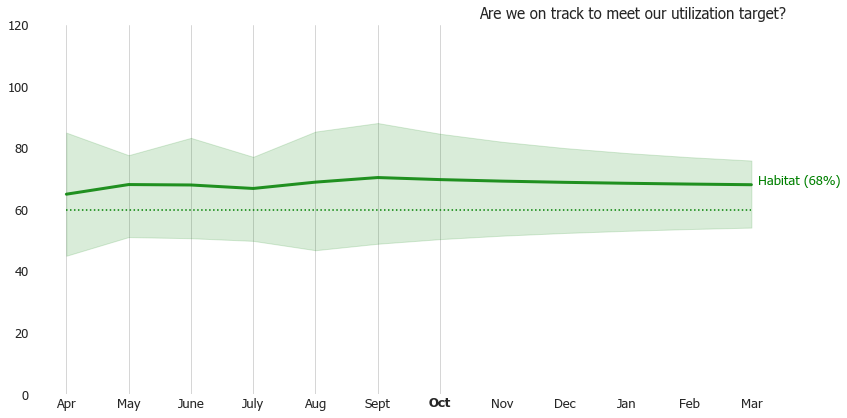

In [46]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6
# plt.style.use('seaborn-whitegrid')

water_color='blue'
habitat_color='green'
water_target = 65
habitat_target = 60

fig, ax = plt.subplots(figsize=[12,6])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax.axes.axvline(i, color='white', linewidth=2)
    
ax.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
# ax.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)
# ax.plot(data[['EA','KR','KB']], color=habitat_color,alpha=.4)
# ax.plot(data[['CP','MM','MC']], color=water_color, alpha=.4)

habitat_min = data[['EA','KR','KB']].min(axis=1)
habitat_max = data[['EA','KR','KB']].max(axis=1)
ax.fill_between(data.index, habitat_min, habitat_max, color=habitat_color, alpha=.15, zorder=10)

water_min = data[['CP','MM','MC']].min(axis=1)
water_max = data[['CP','MM','MC']].max(axis=1)
# ax.fill_between(data.index, water_min, water_max, color=water_color, alpha=.15)

ax.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
# ax.plot([water_target]*12, color=water_color, linestyle='dotted')

# ax.axvline(6, color='grey', alpha=.4, linewidth=3)

# Plot labels
# plt.suptitle('Utilization by Practice Area', y=0.97, fontsize=14)
plt.title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Axes
plt.ylim(0,120)
# ax.tick_params(axis='both', labelsize=12)
#ax.set_xticklabels(fontsize=12)
#ax.set_yticklabels(fontsize=12)

# Axis Lines
ax.yaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
plt.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
# plt.text(11.1, water_value, f'Water ({int(water_value)}%)', color=water_color,
#         fontsize=12)
# for employee in employees:
#     employee_value=data.loc[months[-1], employee]
#     plt.text(11,employee_value,employee)

#Indicate current month
ax.get_xticklabels()[current_month].set_fontweight('bold')
# ax.get_xticklabels()[current_month].set_color('green')
# ax.axes.axvline(current_month, color='silver', linewidth=1)

plt.tight_layout()


    
ax.set_axisbelow(True)

plt.show()

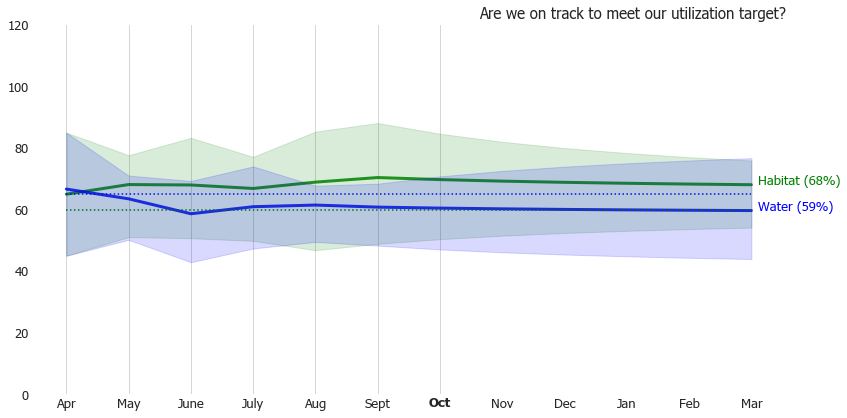

In [48]:
plt.rcParams['font.sans-serif'] = 'Tahoma'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 13

data = projected_y.T
current_month = 6
# plt.style.use('seaborn-whitegrid')

water_color='blue'
habitat_color='green'
water_target = 65
habitat_target = 60

fig, ax = plt.subplots(figsize=[12,6])

# Hide grid lines to denote prediction portion of graph, Note zorder must be specified
# in fill_between call
for i in [7, 8, 9, 10, 11]:
    ax.axes.axvline(i, color='white', linewidth=2)
    
ax.plot(data['Habitat'], color=habitat_color, linewidth=3, alpha=.85)
ax.plot(data['Water'], color=water_color, linewidth=3, alpha=.85)
# ax.plot(data[['EA','KR','KB']], color=habitat_color,alpha=.4)
# ax.plot(data[['CP','MM','MC']], color=water_color, alpha=.4)

habitat_min = data[['EA','KR','KB']].min(axis=1)
habitat_max = data[['EA','KR','KB']].max(axis=1)
ax.fill_between(data.index, habitat_min, habitat_max, color=habitat_color, alpha=.15, 
                zorder=10)

water_min = data[['CP','MM','MC']].min(axis=1)
water_max = data[['CP','MM','MC']].max(axis=1)
ax.fill_between(data.index, water_min, water_max, color=water_color, alpha=.15,
               zorder=10)

ax.plot([habitat_target]*12, color=habitat_color, linestyle='dotted')
ax.plot([water_target]*12, color=water_color, linestyle='dotted')


# Plot labels
# plt.suptitle('Utilization by Practice Area', y=0.97, fontsize=14)
plt.title('Are we on track to meet our utilization target?', loc='right', fontsize=15)

# Axes
plt.ylim(0,120)
# ax.tick_params(axis='both', labelsize=12)
#ax.set_xticklabels(fontsize=12)
#ax.set_yticklabels(fontsize=12)

# Axis Lines
ax.yaxis.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Labels
habitat_value = data.loc[months[-1], 'Habitat']
water_value = data.loc[months[-1], 'Water']
plt.text(11.1, habitat_value, f'Habitat ({int(habitat_value)}%)', color=habitat_color)
plt.text(11.1, water_value, f'Water ({int(water_value)}%)', color=water_color)
# for employee in employees:
#     employee_value=data.loc[months[-1], employee]
#     plt.text(11,employee_value,employee)

#Indicate current month
ax.get_xticklabels()[current_month].set_fontweight('bold')
# ax.get_xticklabels()[current_month].set_color('green')
# ax.axes.axvline(current_month, color='silver', linewidth=1)

plt.tight_layout()


    
ax.set_axisbelow(True)

plt.show()